<h1 style="text-align:center;">Exploratory Data Analysis (EDA) of the Amazon Product Dataset</h1>


## Introduction

Amazon hosts millions of products across multiple categories, each competing for visibility, sales, and customer engagement. Understanding the factors that drive product performance—such as pricing, discounts, customer ratings, reviews, and category dynamics—is essential for sellers and business analysts. 

In this project, we perform an exploratory data analysis (EDA) to identify key trends and patterns within the Amazon product dataset, with the aim of generating insights that can support data-driven decision-making for product strategy and market positioning.


In [2]:
# Import all the necessary package and libraries needed to explore this data which are pandas, matplotlib, numpy and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA CLEANING
Here we carried out cleaning on the two datasets, categories and products. This includes viewing the dataset, structure, checking for missing values and duplicates. 

In [3]:
# Open the dataset using the .read_csv
amazon_data = pd.read_csv("amazon_products.csv")

In [4]:
# View the five rows of the amazon products
amazon_data.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


In [5]:
# View the column names
amazon_data.columns

Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'listPrice', 'category_id', 'isBestSeller', 'boughtInLastMonth'],
      dtype='object')

In [6]:
# View the data types
amazon_data.dtypes

asin                  object
title                 object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
listPrice            float64
category_id            int64
isBestSeller            bool
boughtInLastMonth      int64
dtype: object

In [7]:
# Check for duplicates
amazon_data[amazon_data.duplicated()]

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth


In [8]:
# Count the number of missing values
amazon_data.isnull().sum()

asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [9]:
# Drop the missing values 
amazon_data.dropna(inplace=True)

In [10]:
# Cross-check if there missing values still exist
amazon_data.isnull().sum()

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [11]:
# Open the categories data
amazon_cat_data = pd.read_csv("amazon_categories.csv")

In [12]:
# Check for duplicates
[amazon_cat_data.duplicated()]

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 243    False
 244    False
 245    False
 246    False
 247    False
 Length: 248, dtype: bool]

In [13]:
# Check for the number of missing values
amazon_cat_data.isnull().sum()

id               0
category_name    0
dtype: int64

## FEATURE ENGINEERING
Here we curated some columns, from which we can answer certain questions, rename columns to enable merging of the two datsets and answering questions that generate insights 

In [14]:
# Created the discount column using the listPrice, price and np.where() function
amazon_data['discount'] = np.where(
    amazon_data['listPrice'] > amazon_data['price'],
    amazon_data['listPrice'] - amazon_data['price'],
    0
)
amazon_data['discount'] 

0            0.00
1           40.00
2           64.50
3           62.78
4          135.00
            ...  
1426332      0.00
1426333      0.00
1426334      0.00
1426335      3.03
1426336      0.00
Name: discount, Length: 1426336, dtype: float64

In [15]:
# Create the discount percentage using the discount column
amazon_data['discount_percentage'] = np.where(
    amazon_data['listPrice'] > 0,
    (amazon_data['discount'] / amazon_data['listPrice']) * 100,
    0
).round(1)

amazon_data['discount_percentage']

0           0.0
1          19.0
2          15.0
3          17.7
4          43.5
           ... 
1426332     0.0
1426333     0.0
1426334     0.0
1426335     5.3
1426336     0.0
Name: discount_percentage, Length: 1426336, dtype: float64

In [16]:
# Renamed the id column of the category id to enable merging
amazon_cat_data = amazon_cat_data.rename(columns={'id': 'category_id'})

In [17]:
# Merge the categories and products dataset
amazon_merged = amazon_data.merge(
    amazon_cat_data,
    on='category_id',
    how='left'
)

### Question 1: What are the major product categories on Amazon, and how many products exist in each category

In [18]:
# Using the groupby, reset_index and sort_values to count the major categories on the amazon
category_counts = (
    amazon_merged
    .groupby('category_name')['asin']
    .nunique()
    .reset_index(name='product_count')
    .sort_values(by='product_count', ascending=False)
)

category_counts.head(20)

,category_name,product_count
78,Girls' Clothing,28619
34,Boys' Clothing,24660
220,Toys & Games,20846
137,Men's Shoes,19822
240,Women's Handbags,18994
79,Girls' Jewelry,18514
136,Men's Clothing,18258
135,Men's Accessories,17679
239,Women's Clothing,17393
241,Women's Jewelry,17005


##### Insights: From the dataframe above we can see the major categories of product that were bought by customers were girls and boys clothing with toys following closely. Also we can note that amongst the top ten major categories, fashion items are the top product categories 

### Question 2: What is the distribution of product prices across the platform? (Are most products low-cost, mid-range, or premium?)

In [19]:
# In order to answer the question above, you need to check the distribution of the prices by running descriptives on the price column
amazon_merged['price'].describe()

count    1.426336e+06
mean     4.337541e+01
std      1.302893e+02
min      0.000000e+00
25%      1.199000e+01
50%      1.995000e+01
75%      3.599000e+01
max      1.973181e+04
Name: price, dtype: float64

In [20]:
# Create a function to apply on the dataset base on price
def classify_price(price):
    """ Using the ifs to condition the varying prices
    and returning a specific output """
    if price <= 20:
        return 'Low-cost'
    elif price <= 100:
        return 'Mid-range'
    else:
        return 'Premium'

# Apply the function to the price columns of the dataset and assign it price_category
amazon_merged['price_category'] = amazon_merged['price'].apply(classify_price)

# Counts the products in each category
price_distribution = amazon_merged.groupby('price_category')['asin'].count().reset_index()
price_distribution = price_distribution.rename(columns={'asin': 'product_count'})

# Calculate percentage share to determine the distribution of the prices
price_distribution['percentage_share'] = (
    price_distribution['product_count'] / price_distribution['product_count'].sum() * 100
).round(1)

# Print out the price_distribution column to see the distribution
price_distribution

,price_category,product_count,percentage_share
0,Low-cost,760050,53.3
1,Mid-range,559105,39.2
2,Premium,107181,7.5


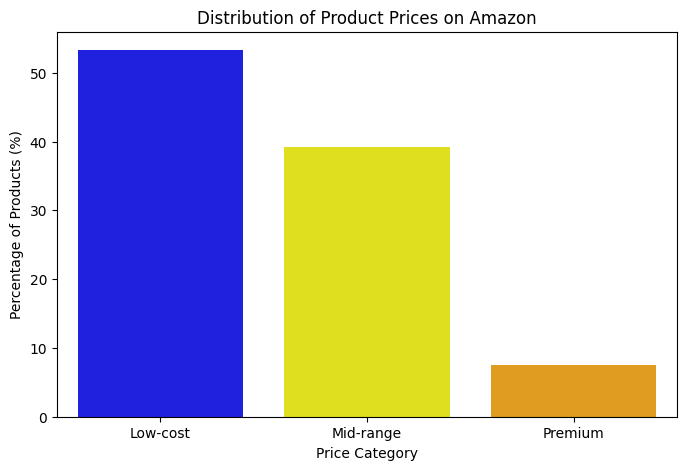

In [21]:
# Visualize the distribution to view what it looks like
plt.figure(figsize=(8,5))
sns.barplot(x=price_distribution['price_category'], y=price_distribution['percentage_share'], data=price_distribution, hue='price_category', palette=['blue','yellow','orange'])
plt.ylabel('Percentage of Products (%)')
plt.xlabel('Price Category')
plt.title('Distribution of Product Prices on Amazon')
plt.show()

##### Insights: The analysis shows that the products in Amazon are dominantly low-cost, which account for over 53% of the products pricing. Mid-range products make up about 39%, while premium-priced items represent only 7.5% of the platform. This indicates that the platform features a higher concentration of affordable products, while premium offerings represent a smaller share of the overall marketplace.

## Question 3: Which product categories have the highest average prices, and which are the cheapest?

In [26]:
# Group the category and calculate the mean price
avg_price_per_category = amazon_merged.groupby('category_name')['price'].mean().reset_index()
avg_price_per_category = avg_price_per_category.rename(columns={'price': 'average_price'})

# Calculate the highest average prices
highest_avg_prices = avg_price_per_category.sort_values(by='average_price', ascending=False)
lowest_avg_prices = avg_price_per_category.sort_values(by='average_price', ascending=True)

# Re-assign the column with a new column name
expensive = highest_avg_prices
cheapest = lowest_avg_prices

# Rename the average price to be expensive_price and 
expensive = expensive.rename(columns={'average_price':'expensive_price'})
cheapest = cheapest.rename(columns={'average_price':'cheapest_price'})
                           
# Print at list 5 categories that are expensive and cheap as well
print(expensive.head(10))
print(cheapest.head(10))

                      category_name  expensive_price
52                 Computer Servers      1534.224685
54              Computers & Tablets       544.380915
193  Smart Home: Home Entertainment       347.994205
130                    Luggage Sets       229.588792
201    Smart Home: Vacuums and Mops       221.128077
191  Smart Home - Heating & Cooling       220.455233
50                Computer Monitors       219.811412
49     Computer External Components       163.548317
229                Video Projectors       161.998471
41                   Camera & Photo       160.576220
                           category_name  cheapest_price
150           Online Video Game Services        9.261064
24                       Baby Stationery       12.463586
3                 Arts & Crafts Supplies       13.458120
209  Stationery & Gift Wrapping Supplies       13.468553
70       Foot, Hand & Nail Care Products       13.476653
157                    Party Decorations       13.767619
132               

In [27]:
expensive = expensive.rename(columns={'category_name':'expensive_cat_name'})
cheapest = cheapest.rename(columns={'category_name':'cheapest_cat_name'})

In [39]:
expensive10 = expensive.head(10)
cheapest10 = cheapest.head(10)

In [40]:
combined_prices = pd.concat([expensive10.reset_index(drop=True), cheapest10.reset_index(drop=True)], axis=1)
combined_prices

,expensive_cat_name,expensive_price,cheapest_cat_name,cheapest_price
0,Computer Servers,1534.224685,Online Video Game Services,9.261064
1,Computers & Tablets,544.380915,Baby Stationery,12.463586
2,Smart Home: Home Entertainment,347.994205,Arts & Crafts Supplies,13.458120
3,Luggage Sets,229.588792,Stationery & Gift Wrapping Supplies,13.468553
4,Smart Home: Vacuums and Mops,221.128077,"Foot, Hand & Nail Care Products",13.476653
5,Smart Home - Heating & Cooling,220.455233,Party Decorations,13.767619
6,Computer Monitors,219.811412,Makeup,14.194324
7,Computer External Components,163.548317,Party Supplies,14.204446
8,Video Projectors,161.998471,Gift Wrapping Supplies,14.441092
9,Camera & Photo,160.576220,Baby Care Products,14.880359


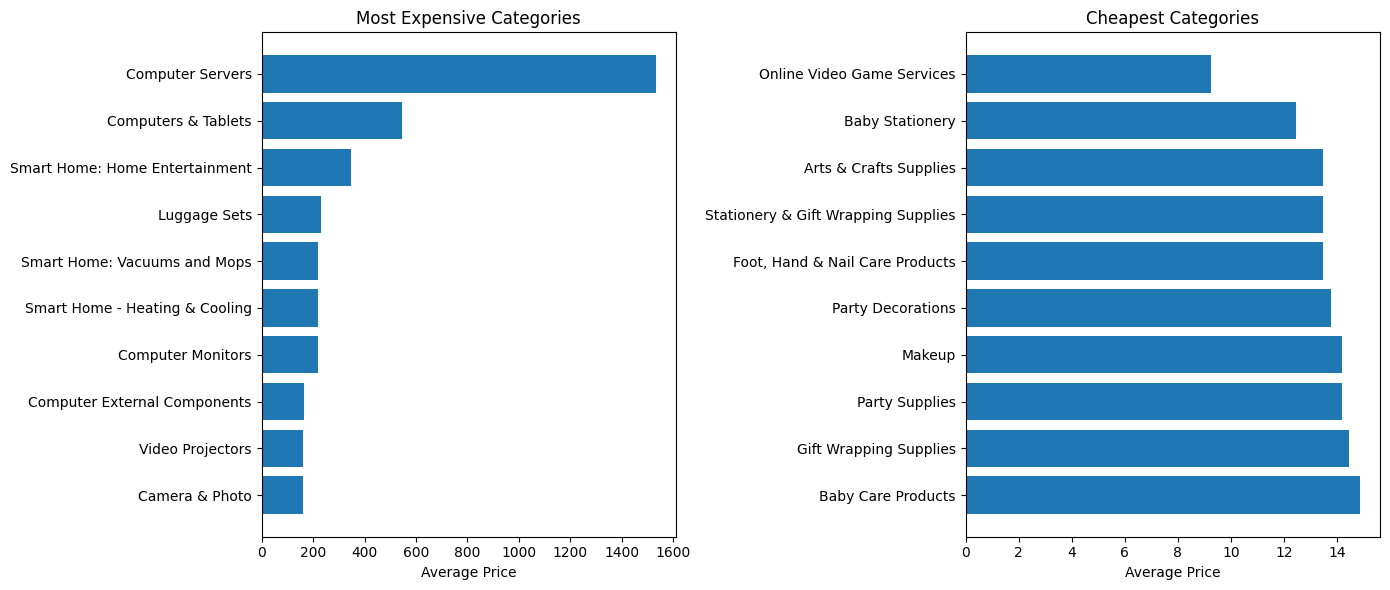

In [41]:
# Visualize the combined prices
# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Most expensive categories
axes[0].barh(
    combined_prices['expensive_cat_name'],
    combined_prices['expensive_price']
)
axes[0].set_title('Most Expensive Categories')
axes[0].set_xlabel('Average Price')
axes[0].invert_yaxis()

# Cheapest categories
axes[1].barh(
    combined_prices['cheapest_cat_name'],
    combined_prices['cheapest_price']
)
axes[1].set_title('Cheapest Categories')
axes[1].set_xlabel('Average Price')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

##### Insights: The analysis shows that technology-oriented categories such as Computer Servers, Computers & Tablets, and Smart Home entertainment products are the highest priced products on Amazon. In contrast, categories like Online Video Game Services, Baby Stationery and Arts & Crafts Supplies are among the cheapest. This highlights a clear pricing divide between high-value equipment-based products and low-cost consumable or digital items. 

### QUESTION 4: How do customer ratings vary across product categories? (Are some categories consistently rated higher than others?)

In [42]:
# Count number of ratings per category
rating_counts = (
    amazon_merged
    .groupby('category_name')['stars']
    .count()
    .reset_index(name='rating_count')
)

# Convert to percentage of total ratings
total_ratings = rating_counts['rating_count'].sum()
rating_counts['rating_percentage'] = ((rating_counts['rating_count'] / total_ratings) * 100).round(1)

# Sort by rating percentage
rating_counts = rating_counts.sort_values(by='rating_percentage', ascending=False)

rating_counts

,category_name,rating_count,rating_percentage
78,Girls' Clothing,28619,2.0
34,Boys' Clothing,24660,1.7
220,Toys & Games,20846,1.5
137,Men's Shoes,19822,1.4
136,Men's Clothing,18258,1.3
...,...,...,...
202,Smart Home: Voice Assistants and Hubs,50,0.0
203,Smart Home: WiFi and Networking,234,0.0
75,Gift Cards,139,0.0
74,Garment Bags,40,0.0


In [43]:
rating_counts['ratings20'] = rating_counts['rating_percentage'].head(20)

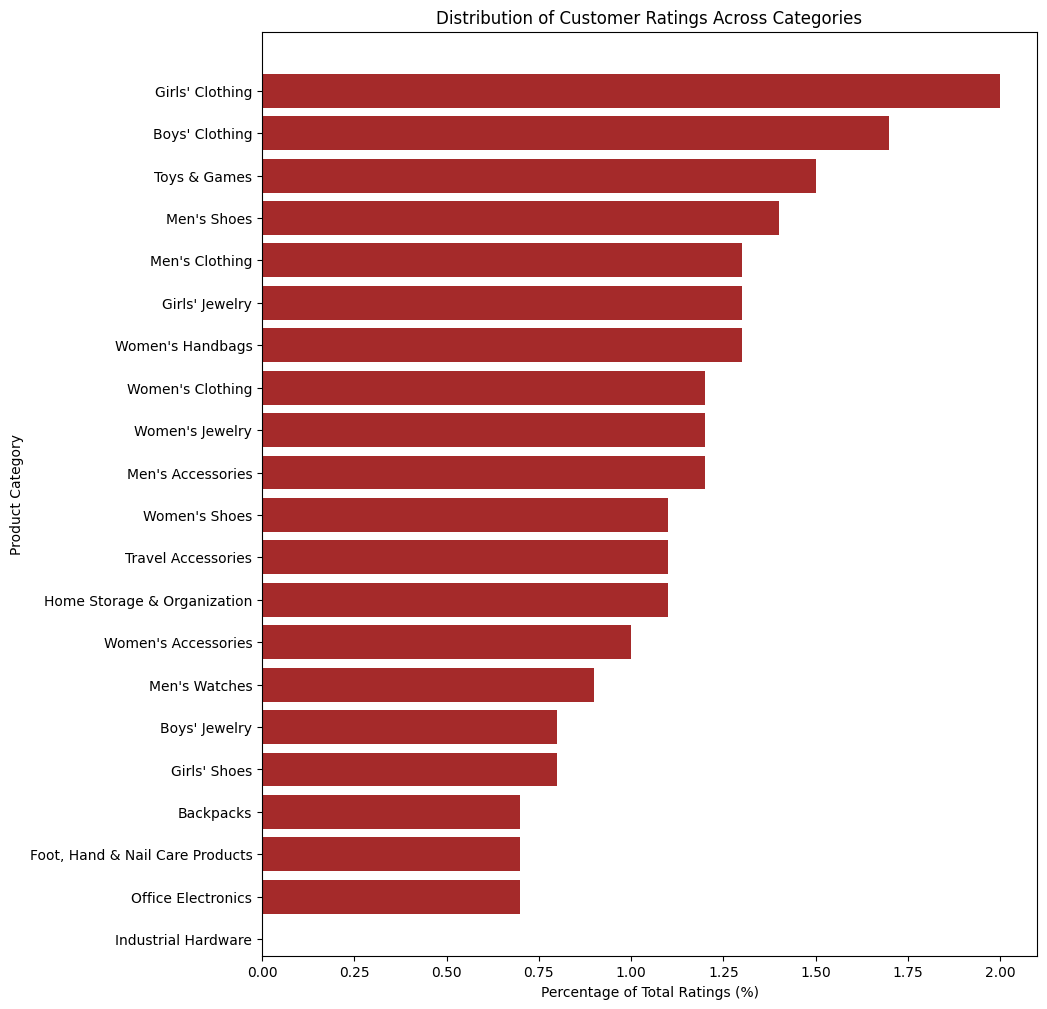

In [44]:
# Visualize with a simple horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(
    rating_counts['category_name'],
    rating_counts['ratings20'],
    color='brown'
)
plt.xlabel('Percentage of Total Ratings (%)')
plt.ylabel('Product Category')
plt.title('Distribution of Customer Ratings Across Categories')
plt.gca().invert_yaxis()  # Highest percentage on top
plt.savefig('rating_percentage_by_category.png', dpi=300)
plt.show()

##### Insights: Customer ratings are heavily concentrated in high-turnover categories such as clothing and toys, while niche or higher-priced categories receive far fewer ratings. This long-tail distribution indicates that customer engagement is driven more by purchase frequency than by product price, highlighting the importance of ratings management for competitive categories.

### QUESTION 5: Is there a relationship between product price and customer rating? (Do expensive products receive better ratings?)

In [45]:
# Check correlation for the two numerical variables
correlation = amazon_merged['price'].corr(amazon_merged['stars'])
print(f"Correlation between price and rating: {correlation:.2f}")


Correlation between price and rating: -0.08


##### Insights: The correlation between product price and customer rating is -0.08, which is very close to zero. This indicates that there is virtually no linear relationship between how expensive a product is and how highly it is rated. In other words, higher-priced products are not necessarily better rated, and cheaper products can receive equally high ratings. 

## QUESTION 6:  How do discounts affect customer engagement (ratings or number of reviews) 

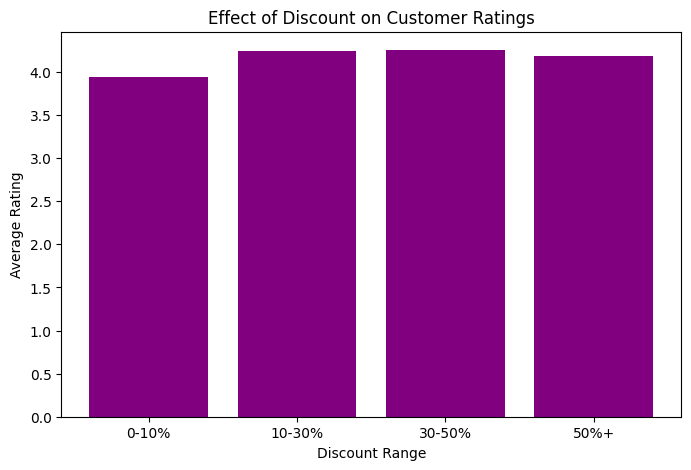

In [46]:
# Create discount bins
# Assuming you already have discount_percentage
bins = [0, 10, 30, 50, 100]
labels = ['0-10%', '10-30%', '30-50%', '50%+']
amazon_merged['discount_category'] = pd.cut(
    amazon_merged['discount_percentage'], bins=bins, labels=labels, include_lowest=True
)

# Aggregate engagement by discount category
rating_by_discount = amazon_merged.groupby('discount_category', observed=True)['stars'].mean().reset_index()

# Visualize rating to the discounts
plt.figure(figsize=(8,5))
plt.bar(rating_by_discount['discount_category'], rating_by_discount['stars'], color='purple')
plt.xlabel('Discount Range')
plt.ylabel('Average Rating')
plt.title('Effect of Discount on Customer Ratings')
plt.show()



In [47]:
# Using correlation to check the relationship
correlation = amazon_merged['discount_percentage'].corr(amazon_merged['stars'])
print(correlation)

0.078328135606323


##### Insights: 
By grouping products into discount ranges, we can see how customer ratings vary with discount levels. If the bar chart shows relatively similar average ratings across all discount categories, it indicates that offering larger discounts does not necessarily lead to higher customer ratings. Conversely, if higher discounts have higher average ratings, it may suggest that discounts slightly improve customer perception or satisfaction, but this should be interpreted carefully alongside other engagement metrics.

From the visuals, we can see that The correlation between discount percentage and customer ratings is 0.078, which is very close to zero. This indicates a very weak positive relationship — meaning that higher discounts barely influence customer ratings. In other words, giving bigger discounts does not significantly make customers rate products higher.

## QUESTION 7: Which products and categories receive the highest number of reviews, and what does this imply about demand?

In [48]:
# Products with the highest number of reviews
top_products = (
    amazon_merged[['asin', 'title', 'reviews']]
    .sort_values(by='reviews', ascending=False)
    .head(10)
)
print(top_products.head(20))

# Categories with the highest number of reviews
category_reviews = (
    amazon_merged
    .groupby('category_name', observed=True)['reviews']
    .sum()
    .reset_index(name='total_reviews')
    .sort_values(by='total_reviews', ascending=False)
)
print(category_reviews.head(20))


               asin                                              title  \
1070592  B00T0C9XRK  essence | Lash Princess False Lash Effect Masc...   
47104    B09MV3KMPT  ThisWorx Cordless Car Vacuum - Portable, Mini ...   
1075466  B07PH22TG9  Queen Size Sheet Set - Breathable & Cooling Sh...   
1075468  B09JVTQKDN  Queen Size Sheet Set - Breathable & Cooling Sh...   
1075493  B07VMNJHBK  Full Size Sheet Set - Breathable & Cooling She...   
116788   B07X6C9RMF  Blink Mini – Compact indoor plug-in smart secu...   
1070627  B004Y9GTOO  Maybelline New York Instant Age Rewind Eraser ...   
104930   B07KKXQNMY  Schick Hydro Silk Touch-Up Exfoliating Dermapl...   
52987    B07WVFCVJN  Roku Express | HD Roku Streaming Device with S...   
65089    B09N3ZNHTY  BOAT Airdopes 141 Bluetooth Truly Wireless in ...   

         reviews  
1070592   346563  
47104     292474  
1075466   281661  
1075468   281661  
1075493   281661  
116788    260659  
1070627   194051  
104930    183726  
52987     1777

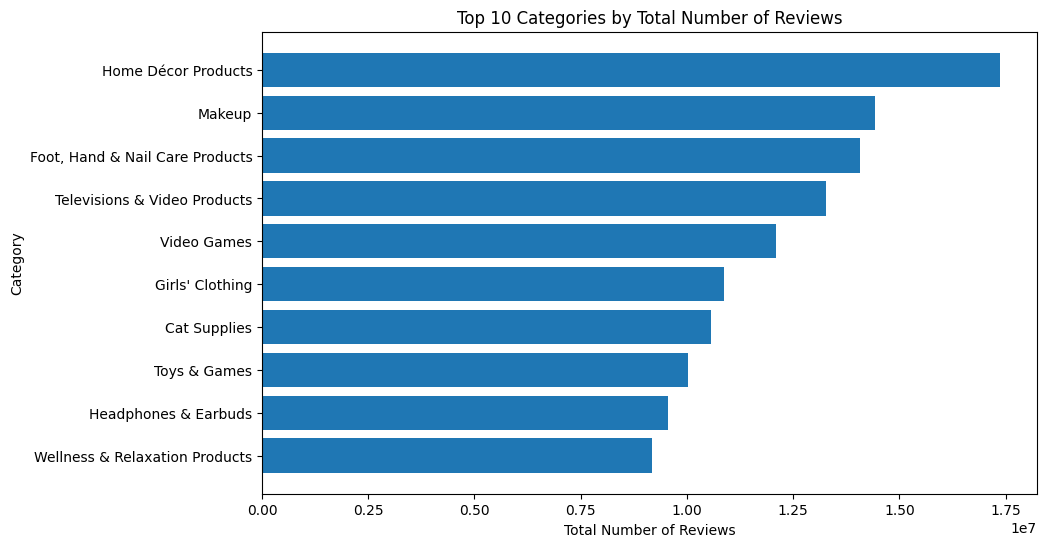

In [49]:
# Visualize the top products and categories
top_categories = category_reviews.head(10)

plt.figure(figsize=(10, 6))
plt.barh(
    top_categories['category_name'],
    top_categories['total_reviews']
)
plt.xlabel('Total Number of Reviews')
plt.ylabel('Category')
plt.title('Top 10 Categories by Total Number of Reviews')
plt.gca().invert_yaxis()
plt.show()

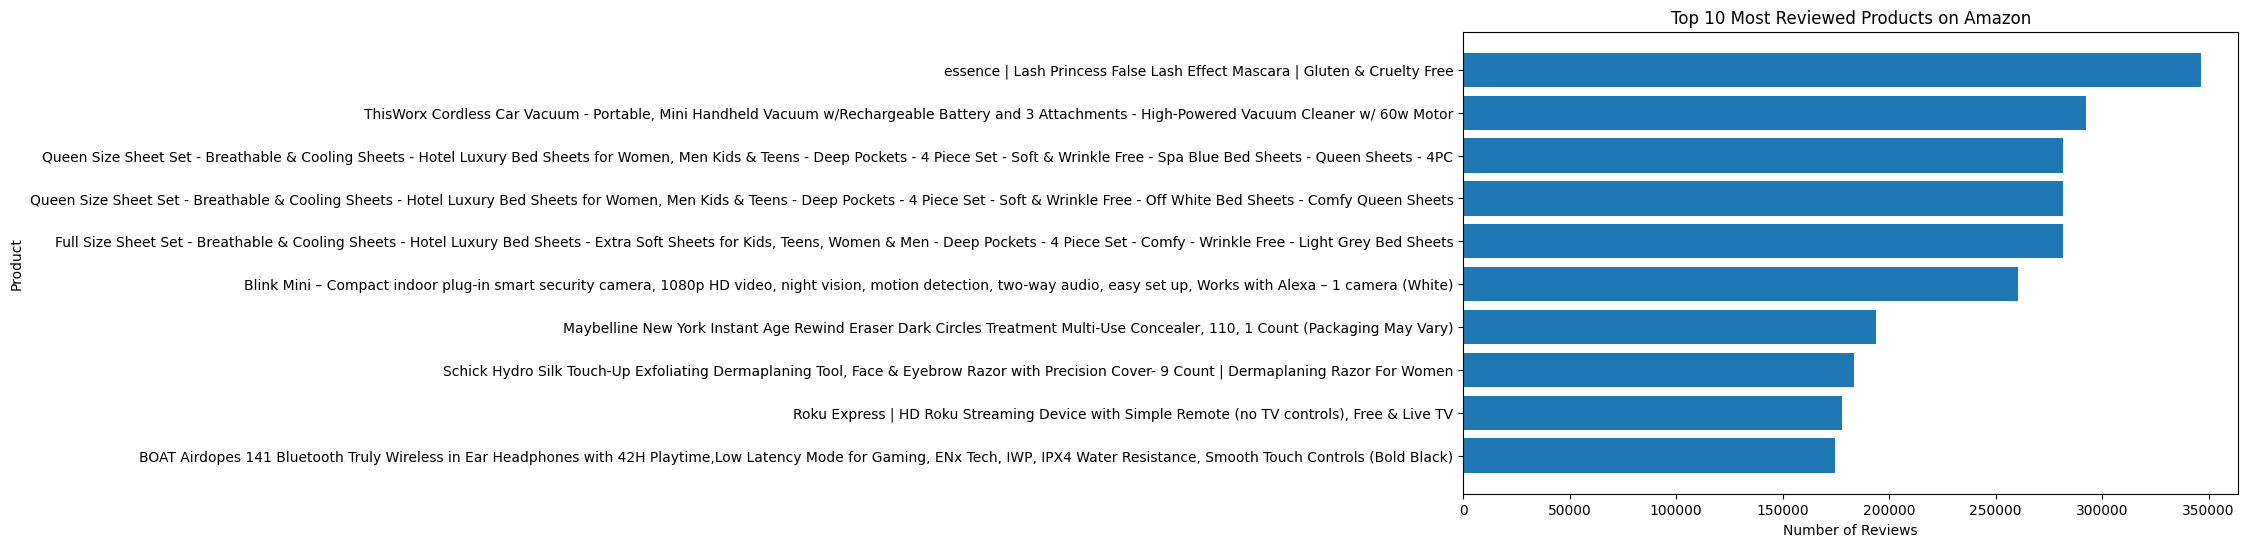

In [50]:
top_products = top_products.head(10)

plt.figure(figsize=(10, 6))
plt.barh(
    top_products['title'],
    top_products['reviews']
)
plt.xlabel('Number of Reviews')
plt.ylabel('Product')
plt.title('Top 10 Most Reviewed Products on Amazon')
plt.gca().invert_yaxis()  # Highest at the top
plt.show()

##### Insights: “Highly reviewed products are mainly everyday essentials, electronics, and personal care items, showing strong customer engagement. Categories such as Home Décor, Makeup, and Foot & Hand Care dominate total reviews, indicating concentrated demand. Overall, popularity is driven more by usefulness and appeal than price, reflecting a long-tail pattern of engagement across categories.”

## QUESTION 8: Are highly rated products always the most reviewed or best-priced? (Explore mismatches between quality perception and popularity.)

In [51]:
# Define high and low price using quantiles, also set threshold for rating and reviews
high_rating = 4.5
low_rating = 2.49
high_reviews = 50      
low_reviews = 10
low_price = amazon_merged['price'].quantile(0.25)
high_price = amazon_merged['price'].quantile(0.75)


# Highly rated but NOT popular (quality ≠ popularity)
high_rating_low_reviews = amazon_merged[
    (amazon_merged['stars'] >= high_rating) &
    (amazon_merged['reviews'] < high_reviews)
]

# Popular but NOT highly rated (popularity ≠ quality)
high_reviews_low_rating = amazon_merged[
    (amazon_merged['reviews'] >= high_reviews) &
    (amazon_merged['stars'] < low_rating)
]

# Highly rated but EXPENSIVE (quality ≠ best price)
high_rating_expensive = amazon_merged[
    (amazon_merged['stars'] >= high_rating) &
    (amazon_merged['price'] >= high_price)
]

# Highly rated and CHEAP (best-value products)
high_rating_cheap = amazon_merged[
    (amazon_merged['stars'] >= high_rating) &
    (amazon_merged['price'] <= low_price)
]


In [52]:
print(high_rating_low_reviews[['title', 'category_name', 'stars', 'reviews', 'price','discount']].head(10).head(10))

                                                title category_name  stars  \
0   Sion Softside Expandable Roller Luggage, Black...     Suitcases    4.5   
1   Luggage Sets Expandable PC+ABS Durable Suitcas...     Suitcases    4.5   
2   Platinum Elite Softside Expandable Checked Lug...     Suitcases    4.6   
3   Freeform Hardside Expandable with Double Spinn...     Suitcases    4.6   
4   Winfield 2 Hardside Expandable Luggage with Sp...     Suitcases    4.5   
5   Maxlite 5 Softside Expandable Luggage with 4 S...     Suitcases    4.5   
6   Hard Shell Carry on Luggage Airline Approved, ...     Suitcases    4.5   
7   Maxporter II 30" Hardside Spinner Trunk Luggag...     Suitcases    4.5   
8   Omni 2 Hardside Expandable Luggage with Spinne...     Suitcases    4.5   
10  Crew Versapack Softside Expandable 8 Spinner W...     Suitcases    4.7   

    reviews   price  discount  
0         0  139.99      0.00  
1         0  169.99     40.00  
2         0  365.49     64.50  
3         0  

In [53]:
print(high_reviews_low_rating[['title', 'category_name', 'stars', 'reviews', 'price','discount']].head(10).head(10))

                                                    title  \
62587   PHILIPS A7306 True Wireless Sports Headphones ...   
67061   Pyle Upgraded Active Sport Waterproof Headphon...   
119454  INKjetsclub Compatible Ink Cartridge Replaceme...   
120639  Portable Home Mini USB Projector for Phone iPh...   
132065  2 pcs Bubble Ball 27 inch Jelly Bubble Balloon...   
132988  Ginkago Bubble Ball Toy for Adults Kids Inflat...   
135422  47'' Water Bubble Ball Toy for Kids Beach Ball...   
135678  2 pcs Bubble Ball Toy for Kids Inflatable Wate...   
143160            Wink WNKHUB-2US 2 Smart home hub, White   
180203  3 Pair Acupressure Slimming Earrings, Ear Orna...   

                                category_name  stars  reviews  price  discount  
62587                    Headphones & Earbuds    2.2       51  28.05    151.94  
67061                    Headphones & Earbuds    2.4      164  10.69      2.67  
119454                     Office Electronics    2.4      152  62.45      5.00  
1206

In [54]:
print(high_rating_expensive[['title', 'category_name', 'stars', 'reviews', 'price','discount']].head(10))

                                                title category_name  stars  \
0   Sion Softside Expandable Roller Luggage, Black...     Suitcases    4.5   
1   Luggage Sets Expandable PC+ABS Durable Suitcas...     Suitcases    4.5   
2   Platinum Elite Softside Expandable Checked Lug...     Suitcases    4.6   
3   Freeform Hardside Expandable with Double Spinn...     Suitcases    4.6   
4   Winfield 2 Hardside Expandable Luggage with Sp...     Suitcases    4.5   
5   Maxlite 5 Softside Expandable Luggage with 4 S...     Suitcases    4.5   
6   Hard Shell Carry on Luggage Airline Approved, ...     Suitcases    4.5   
7   Maxporter II 30" Hardside Spinner Trunk Luggag...     Suitcases    4.5   
8   Omni 2 Hardside Expandable Luggage with Spinne...     Suitcases    4.5   
10  Crew Versapack Softside Expandable 8 Spinner W...     Suitcases    4.7   

    reviews   price  discount  
0         0  139.99      0.00  
1         0  169.99     40.00  
2         0  365.49     64.50  
3         0  

In [55]:
print(high_rating_cheap[['title', 'category_name', 'stars', 'reviews', 'price','discount']].head(10))

                                                 title category_name  stars  \
180  4 KIX 2.0 Softside Expandable Luggage with Spi...     Suitcases    4.5   
269  8pcs Luggage Wheel Covers, Portable Suitcase W...     Suitcases    5.0   
461  920 Heavy Duty Protective Dry Box Case With Ac...     Suitcases    4.8   
480                           Tranverz L - Sunday Grey     Suitcases    4.8   
514  Rubber Duck Elastic Travel Luggage Cover Trave...     Suitcases    5.0   
518  Capri 2.0 27"-Inch Spinner - Expandable Luxury...     Suitcases    5.0   
570                           Tranverz M - Sunday Grey     Suitcases    4.8   
624  BIGCARJOB Art Flower Luggage Handle Wrap Set 2...     Suitcases    5.0   
626      AOLDHYY T Garden Sculpture Outdoor Decoration     Suitcases    4.8   
656  Sewroro Luggage Cover Suitcase Protector Washa...     Suitcases    5.0   

     reviews  price  discount  
180        0   0.00       0.0  
269        0  11.99       0.0  
461        0   0.00       0.0  
48

##### Insights: This analysis reveals that product quality, popularity and price do not always align, highlighting hidden high-quality products, popular but mediocre items and premium offerings that require better market visibility.

## QUESTION 9: What are the top-performing products based on a combined metric (e.g., rating × reviews × price or discount)?

In [56]:
# Create a combined metric to ascertain performance
amazon_merged['combined_score'] = (
    amazon_merged['stars'] * np.log1p(amazon_merged['reviews']) * amazon_merged['price']
)

# Rank the products
top_products = amazon_merged[['title', 'category_name', 'stars', 'reviews', 'price', 'combined_score']]
top_products = top_products.sort_values(by='combined_score', ascending=False).head(10)
top_products


,title,category_name,stars,reviews,price,combined_score
118376,"SAMSUNG 130"" The Premiere Ultra Short Throw 4K...",Office Electronics,4.3,275,5997.99,144957.765211
124354,Sony VPL-XW6000ES 4K HDR Laser Home Theater Pr...,Office Electronics,5.0,5,11998.00,107487.650559
53913,Denon AVR-X8500HA 13.2 Channel (150 W/Ch) Rece...,Televisions & Video Products,4.6,56,4565.61,84911.378375
233494,hrm Automatic T-Shirt Printing Machine Printer...,Printmaking Supplies,4.1,35,5699.00,83732.145164
180506,"AC-Dual Fully Automatic Machine, Recovery and ...",Automotive Tools & Equipment,4.7,29,4778.00,76379.329121
119808,LG HU85LA Ultra Short Throw 4K UHD Laser Smart...,Office Electronics,4.3,102,3614.95,72043.548291
117730,AWOL VISION LTV-2500 4K UHD Ultra Short Throw ...,Office Electronics,4.3,161,2999.00,65608.116060
52514,Denon AVR-X6700H 8K Ultra HD 11.2 Channel (140...,Televisions & Video Products,4.6,264,2545.00,65321.897073
138555,Razer Blade 16 Gaming Laptop: NVIDIA GeForce R...,Video Games,3.8,41,4299.99,61073.379531
198370,ASUS ProArt Display 32” 4K HDR Computer Monito...,Computer Monitors,3.9,132,2999.00,57198.012439


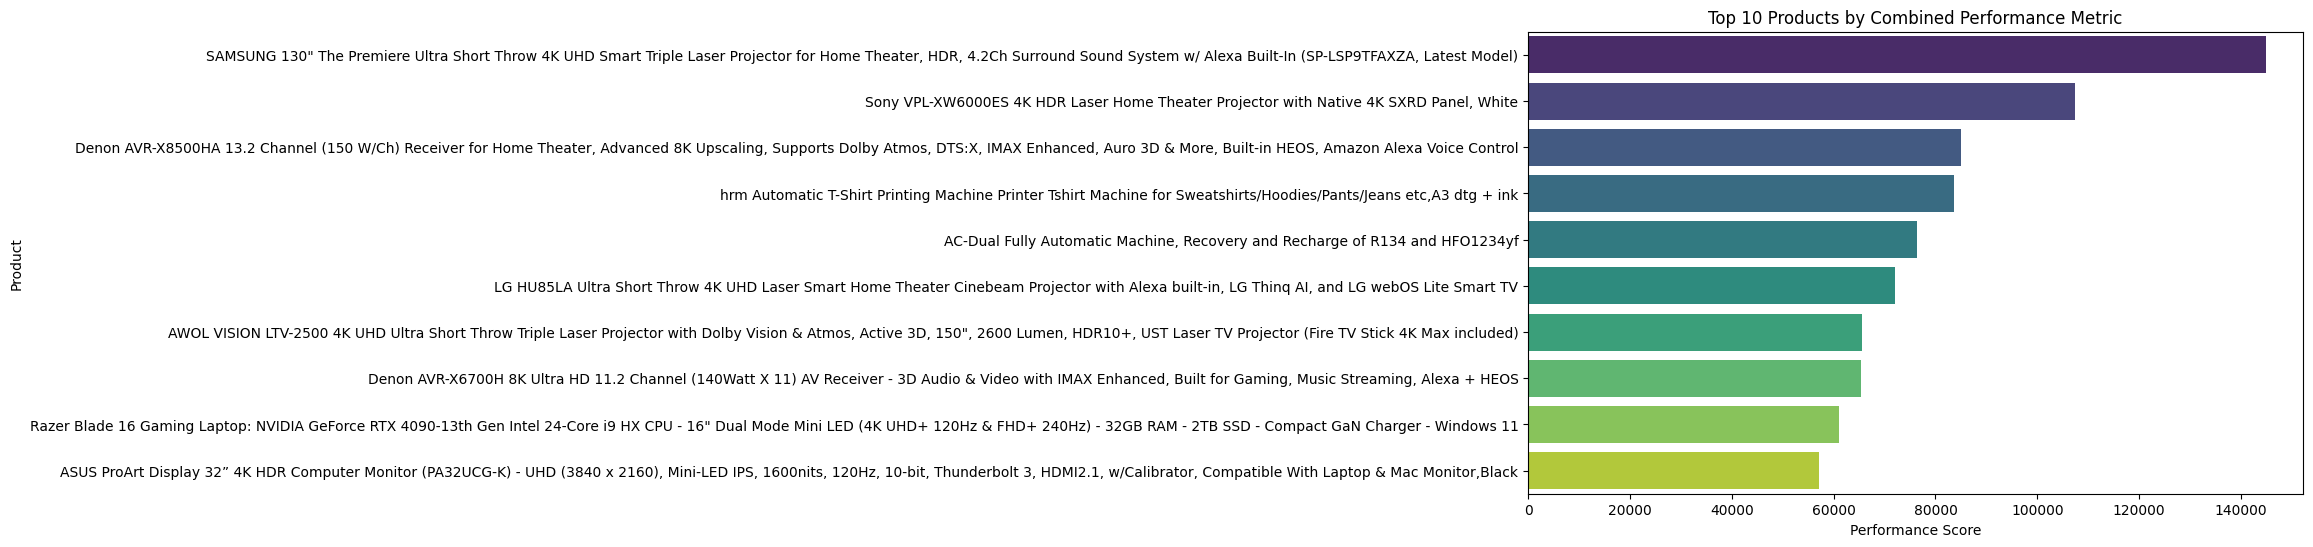

In [57]:
# Visualize the top products based on your metric
plt.figure(figsize=(10,6))
sns.barplot(
    y='title',
    x='combined_score',
    data=top_products,
    palette='viridis',
    hue = 'title'
)
plt.xlabel('Performance Score')
plt.ylabel('Product')
plt.title('Top 10 Products by Combined Performance Metric')
plt.show()

##### Insight: The combined performance metric reveals that high-priced premium electronics dominate overall rankings, indicating that revenue potential outweighs popularity and even perfect customer ratings in determining top-performing products.